# **Author : ROHIT WADHAVE**
###  **The Sparks Foundation** - Data Science and Business Analytics 
#####            *(GRIP DECEMBER'22)*



# Task 1 : Prediction using Supervised Machine Learning


### Problem Statement
Aim:- Predict the percentage of an student based on the number of study hours. This is a simple linear regression task as it involves just 2 variables.

Question:- What will be predicted score if a student studies for 9.25hr/day.

## **Importing all libraries required in this notebook**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

####  Dataset needed  : http://bit.ly/w-data

Read the csv dataset as a pandas dataframe.

In [2]:
path = 'http://bit.ly/w-data'
data = pd.read_csv(path)

print('Data is imported successfully')

Data is imported successfully


## **Data Understanding**

In [3]:
data.head()          # Check top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()          # Check last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()   #Statistical information of dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Check if missing values present or not**

In [8]:
#Checking for missing/Null values
p=data.isnull().sum()   #Displays sum total of null values present in dataset
q=data.nunique()        #Displays all number of unique values in dataset

print(p)
print()
print(q)

Hours     0
Scores    0
dtype: int64

Hours     23
Scores    23
dtype: int64


In [9]:
# Check if there is any null value present in our Dataset
data.isnull == True

False

In [10]:
#Check if the duplicate values are present in the dataset.
data[data.duplicated()]      # No duplicate value present in the dataset.

,Hours,Scores


***------>   So, since there is no null value and duplicates present in the  Dataset so, we are now safe to visualize our data.***

## **Data Visualization**

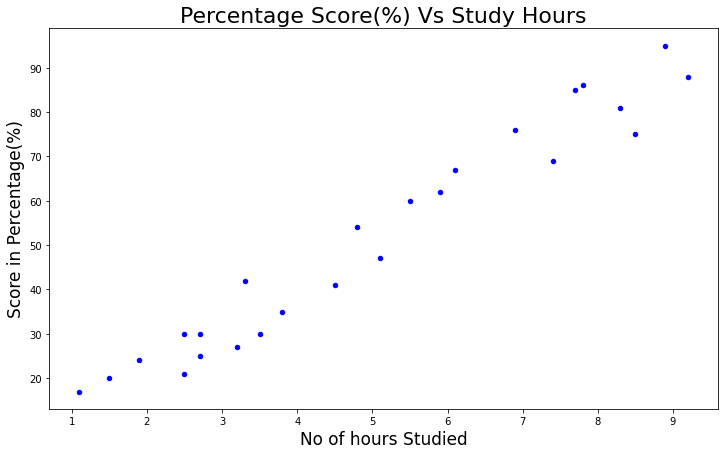

In [11]:
data.plot(kind='scatter',x='Hours',y='Scores',color='b',figsize=(12,7))
plt.title('Percentage Score(%) Vs Study Hours',size=22)
plt.ylabel('Score in Percentage(%)', size=17)
plt.xlabel('No of hours Studied', size=17)
plt.show()

***------>   We can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.***

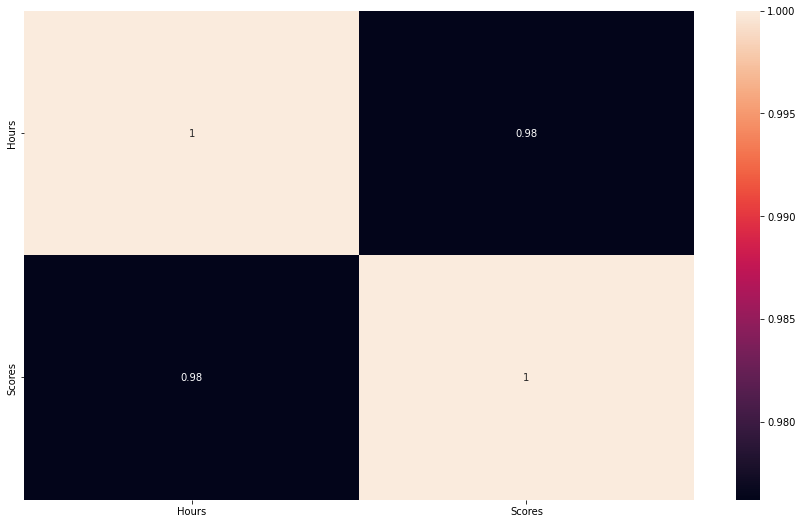

In [12]:
#Plotting heatmap to find any coorelation 
correlation=data.corr()
plt.figure(figsize=(15,9))
sns.heatmap(correlation,annot=True) 

***------>   It is clear that variable is highly dependent on one another i.e. 0.98.***

***-----> It is confirmed that the variables are positively correlated.***

# **Preparing the data**

### **Divide the data into inputs & outputs** 

In [13]:
#Independant variable is "X"
#Dependant variable is "y"

X = data.iloc[:, :-1].values   #This slicing will show all rows & 0th column only(Hours).
y = data.iloc[:, 1].values     #This slicing will show all rows & 1st column only(Scores).

In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [16]:
y[ :5]

array([21, 47, 27, 75, 30])

### **Dividing data into training and testing data**

In [17]:
#Split the data into train and test data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


### **Training the Algorithm**

In [18]:
#Building simple linear regression model

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 



LinearRegression()

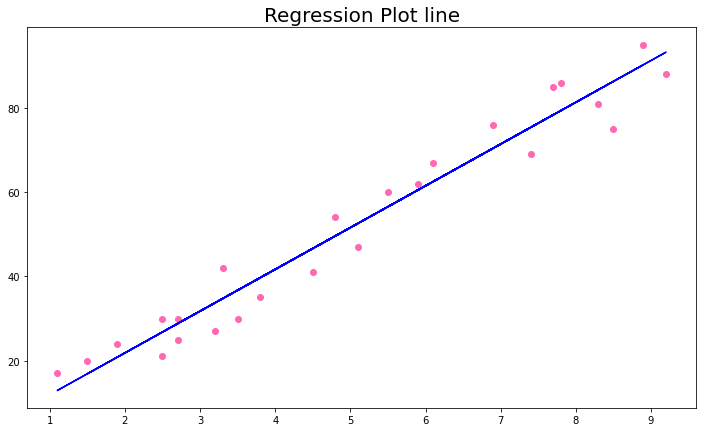


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [19]:
#Plotting graph of the regression line
 
line = regressor.coef_*X+regressor.intercept_

#plotting for the test data
plt.figure(figsize=(12,7))
plt.scatter(X, y, color = 'hotpink')
plt.plot(X, line,"-b")
plt.title("Regression Plot line",size=20)

plt.show()

print()
print(data.corr())

In [20]:
#Estimating training and test score

print(f'Test Score: {regressor.score(X_test, y_test)}')
print()
print(f'Training Score: {regressor.score(X_train, y_train)}')


Test Score: 0.9454906892105354

Training Score: 0.9515510725211552


### **Making Predictions of Percentage of Scores(%) using test data**
Now that we have trained our algorithm, it's time to make some predictions.

In [21]:
# Testing data - (In Hours)

print(X_test)                                    
y_pred = regressor.predict(X_test)              # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
y_test

array([20, 27, 69, 30, 62])

In [23]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### **Comparing the Predicted Scores with the Actual Scores**

In [24]:
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})        # Comparing Actual vs Predicted
df 

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Visually comparing the Predicted Scores with the Actual Scores**

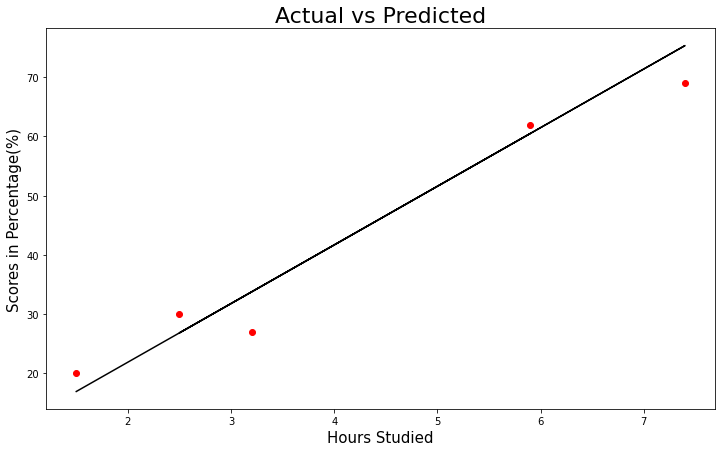

In [25]:
plt.figure(figsize=(12,7))
plt.scatter(x=X_test, y=y_test, color='Red')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=22)
plt.ylabel('Scores in Percentage(%)', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

### **Model Evaluation Metrics**

In [26]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error: 21.598769307217456
Mean Absolute Error: 4.183859899002982


### **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [27]:
#Testing the predictions corresponds to 9.25 hrs

hours = 9.25
prediction = regressor.predict([[hours]])
print(f"No. of hours studied = {hours}")
print(f"Scores obtained = {prediction}")

No. of hours studied = 9.25
Scores obtained = [93.69173249]


In [28]:
print(f"The score of student who studied for 9.25 hours a day = {regressor.predict([[9.25]])}")

The score of student who studied for 9.25 hours a day = [93.69173249]


# **Conclusion**

## -----> ***I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters***.

## -----> ***According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 Score.***